In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
points_X, points_Y = make_circles(n_samples=1000, noise=0.1, random_state=15, factor=0.1)

In [3]:
# points_Y

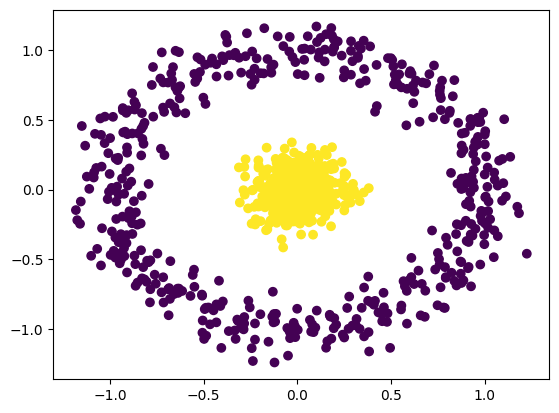

In [4]:
plt.scatter(points_X[:, 0], points_X[:, 1], c = points_Y)

In [5]:
points_X.shape

(1000, 2)

In [6]:
X1 = points_X[:, 0].reshape(-1, 1)
X2 = points_X[:, 1].reshape(-1, 1)
print(X1.shape)
X3 = X1 + X2

print(X3.shape)

(1000, 1)
(1000, 1)


In [7]:
points_X = np.hstack((points_X, X3))

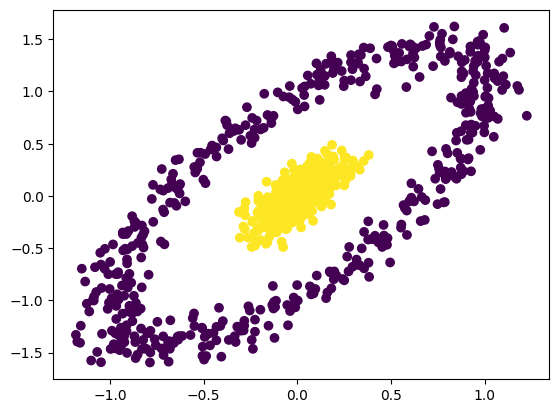

In [8]:
plt.scatter(points_X[:, 0], points_X[:, 2], c = points_Y)

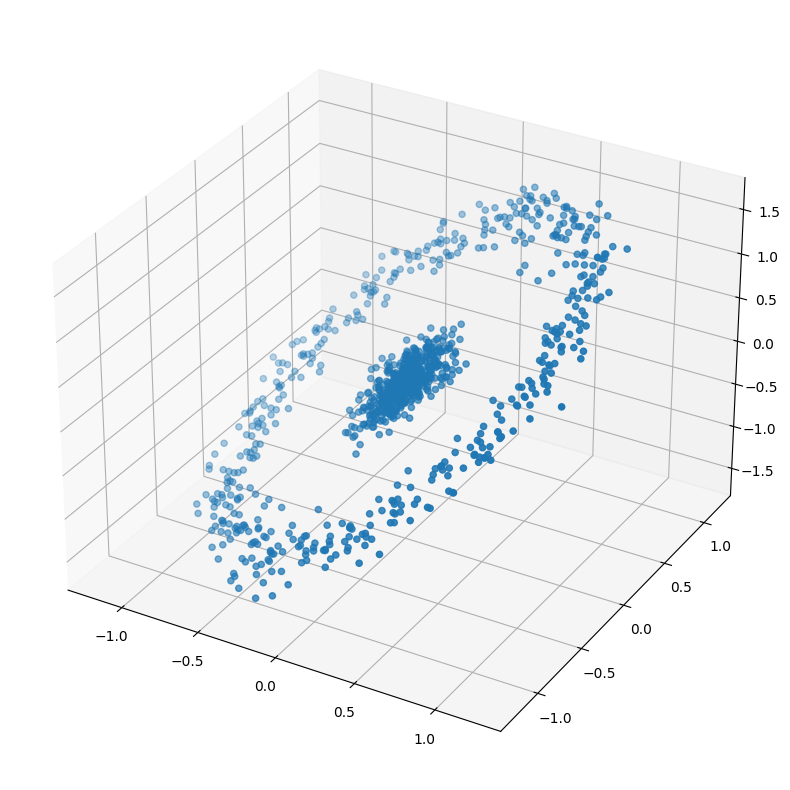

In [9]:
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(projection = '3d')
ax.scatter(points_X[:, 0], points_X[:, 1], points_X[:, 2])

In [10]:
points_X.shape, points_Y.shape

((1000, 3), (1000,))

In [67]:
from sklearn import svm

In [68]:
my_svm = svm.SVC?

In [69]:
my_svm = svm.SVC(kernel='poly', C = 1, degree = 10)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=10, kernel='poly')

In [70]:
bias = my_svm.intercept_
print(bias)

[1.00061216]


In [14]:
my_svm.score(points_X, points_Y)

0.989

In [15]:
my_svm = svm.SVC(kernel='rbf', C = 1, degree=5)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=5)

In [16]:
my_svm.score(points_X, points_Y)

1.0

In [39]:
my_svm = svm.SVC(kernel='linear', C = 1, degree=5)
my_svm.fit(points_X, points_Y)

SVC(C=1, degree=5, kernel='linear')

In [40]:
my_svm.score(points_X, points_Y)

0.684

In [19]:
weights = my_svm.coef_
bias = my_svm.intercept_

In [47]:
bias

array([0.59381535])

In [21]:
mesh_X, mesh_Y = np.meshgrid(points_X[:, 0], points_X[:, 1])

In [55]:
plane = -(weights[0][0]*mesh_X + weights[0][1]*mesh_Y + bias[0])/weights[0][2]

In [56]:
plane.shape

(1000, 1000)

In [57]:
# print(plane.reshape(-1, 1).shape)
# print(points_X[:, 0].shape)
# p = np.array(np.meshgrid(points_X[:, 0], plane))
# print(p.shape)

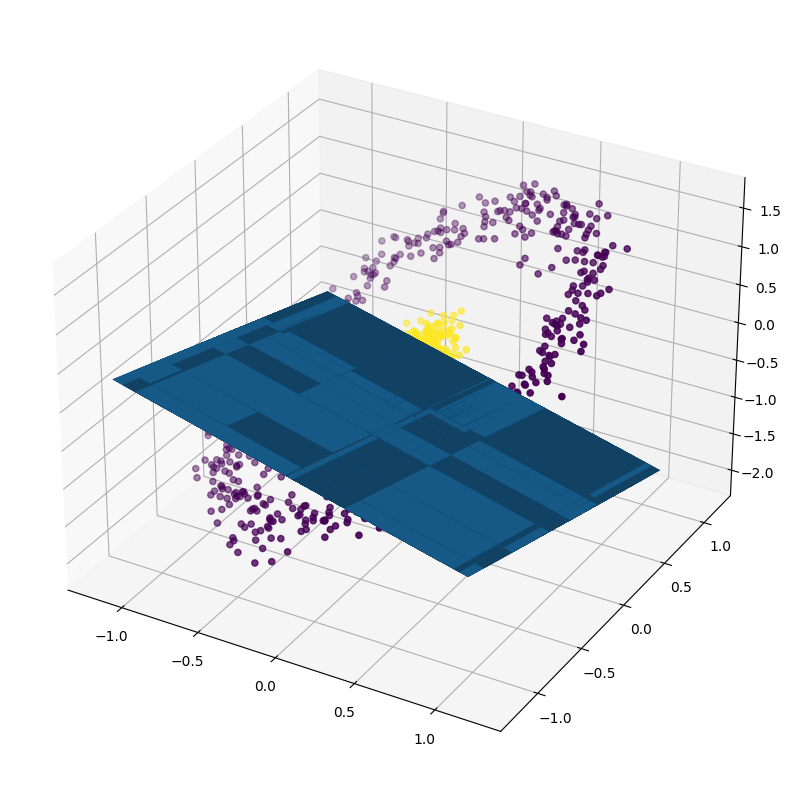

In [66]:
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot(projection = '3d')
ax.scatter(points_X[:, 0], points_X[:, 1], points_X[:, 2], c = points_Y)
# plane_mesh = np.meshgrid(points_X[:, 0].reshape(-1, 1), plane.reshape(-1, 1))
# plane_mesh = np.array(plane_mesh)
# print(np.array(plane_mesh).shape)
ax.plot_surface(mesh_X, mesh_Y, plane)